In [0]:
def from_name_func(path, fnames, _get_label, valid_pct):
  src = 

In [0]:
def from_name_re(path, fnames, pat, valid_pct):
  pat = re.compile(pat)
  def _get_label(fn):
    if isinstance(fn, path):
      fn = fn.as_posix()
    res = pat.search(str(fn))
    return res.group(1)
  return from_name_func(path, fnames, _get_label, valid_pct)
  

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [5]:
 path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path / 'annotations'
path_img = path / 'images'

In [11]:
files = get_image_files(path_img); files[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_150.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_67.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_168.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_70.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_63.jpg')]

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path, files, pat, ds_tfms=get_transforms(), size=224, bs=64)
data = data.normalize(imagenet_stats)

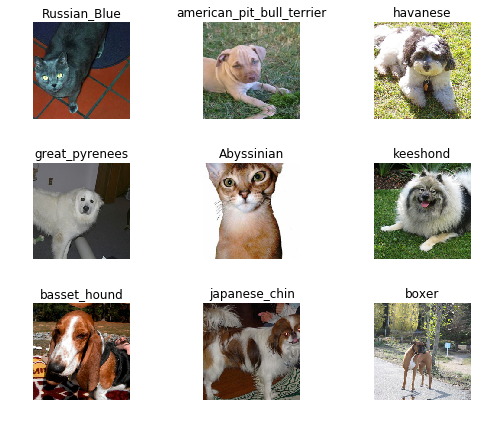

In [17]:
data.show_batch(rows=3, figsize=(7, 6))

In [20]:
print(data.classes)
data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 75600119.75it/s]


In [23]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.426783,0.354658,0.116373,01:29
1,0.557105,0.283602,0.092693,01:29
2,0.345417,0.208883,0.073072,01:31
3,0.254703,0.202657,0.070365,01:32


In [0]:
learn.save('stage-1')

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

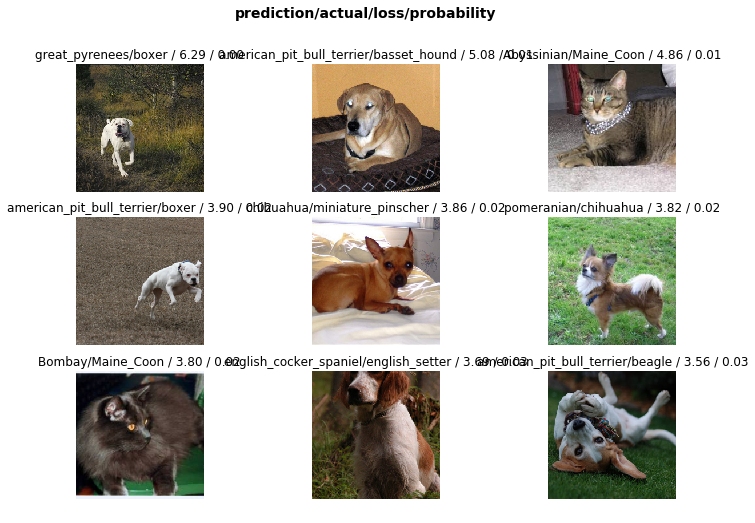

In [31]:
interp.plot_top_losses(9, figsize=(12, 8), heatmap=False)

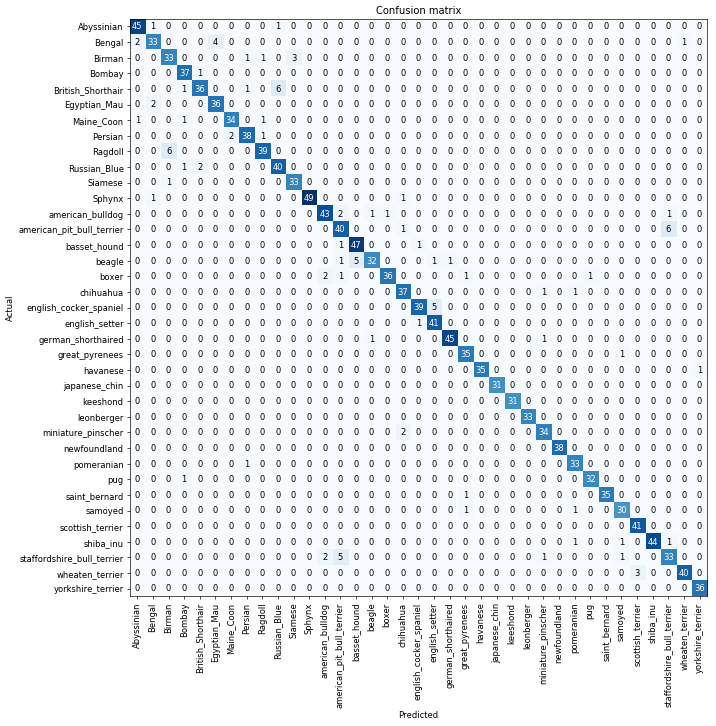

In [32]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [35]:
interp.most_confused(min_val=2)

[('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('beagle', 'basset_hound', 5),
 ('english_cocker_spaniel', 'english_setter', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Birman', 'Siamese', 3),
 ('wheaten_terrier', 'scottish_terrier', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('boxer', 'american_bulldog', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.532198,0.362069,0.121110,01:32


In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


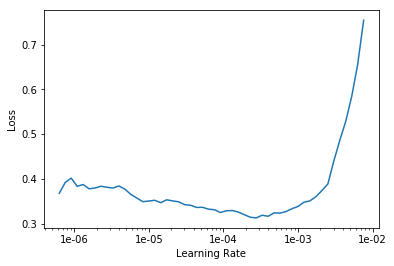

In [40]:
learn.recorder.plot()

In [0]:
learn.load('stage-1');

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


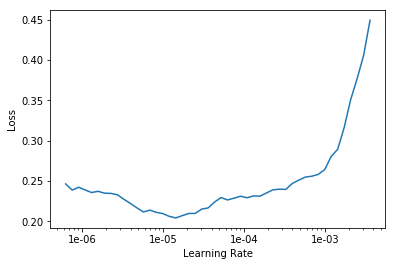

In [44]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.229921,0.192005,0.064276,01:31
1,0.214412,0.190645,0.064953,01:31


In [0]:
data_50 = ImageDataBunch.from_name_re(path_img, files, pat, ds_tfms=get_transforms(), size=224, bs=32)
data_50 = data_50.normalize(imagenet_stats)

In [48]:
learn_50 = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:00, 104046462.62it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


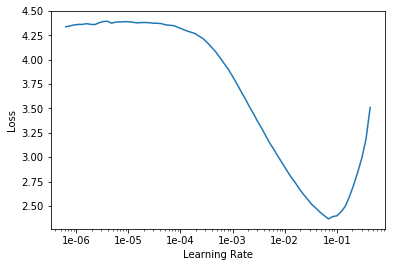

In [49]:
learn_50.lr_find()
learn_50.recorder.plot()

In [51]:
learn_50.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.059567,0.291441,0.088633,01:42
1,0.481165,0.252011,0.081191,01:39
2,0.342588,0.247954,0.084574,01:37
3,0.248772,0.185274,0.063599,01:40
4,0.192886,0.184169,0.060217,01:37
5,0.142796,0.166785,0.052774,01:39
6,0.114212,0.165509,0.056834,01:40
7,0.109962,0.157823,0.055480,01:38


In [0]:
learn_50.save('stage-1-50')

In [53]:
learn_50.unfreeze()
learn_50.fit_one_cycle(7, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.089566,0.161275,0.055480,01:44
1,0.089968,0.154191,0.052097,01:45
2,0.089084,0.155482,0.054127,01:42
3,0.073845,0.151600,0.050068,01:43
4,0.064132,0.154084,0.051421,01:47
5,0.065989,0.156180,0.051421,01:44
6,0.053555,0.154408,0.052774,01:44


In [54]:
learn_50.unfreeze()
learn_50.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.055024,0.159616,0.053451,01:40
1,0.052965,0.156817,0.052774,01:41
2,0.050152,0.147845,0.049391,01:44
3,0.043567,0.150378,0.050744,01:42


In [0]:
inter50p = ClassificationInterpretation.from_learner(learn_50)

In [56]:
inter50p.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('basset_hound', 'beagle', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('beagle', 'english_setter', 2),
 ('boxer', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


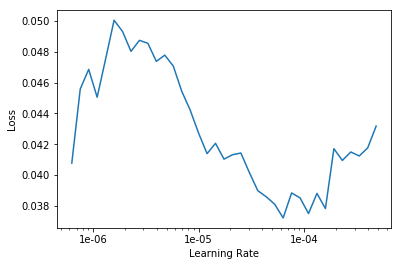

In [57]:
learn_50.lr_find()
learn_50.recorder.plot()

In [58]:
learn_50.fit_one_cycle(2, max_lr=slice(1e-7,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.050805,0.149687,0.051421,01:40
1,0.041099,0.149165,0.046008,01:43


In [59]:
learn_50.fit_one_cycle(3, max_lr=slice(1e-7,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.045446,0.149777,0.048038,01:39
1,0.038009,0.149830,0.045332,01:38
2,0.041328,0.149926,0.046685,01:42


In [60]:
inter50p.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('basset_hound', 'beagle', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('beagle', 'english_setter', 2),
 ('boxer', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

In [61]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [62]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

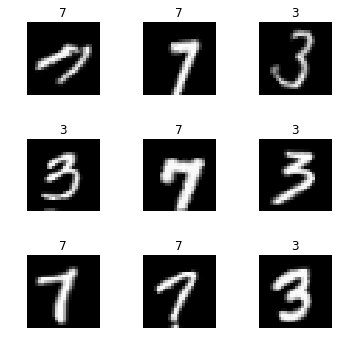

In [64]:
data.show_batch(rows=3, figsize=(5, 5))

In [65]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:00, 118646222.13it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.195747,0.099594,0.959764,00:14
1,0.128536,0.075705,0.971541,00:17


In [66]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

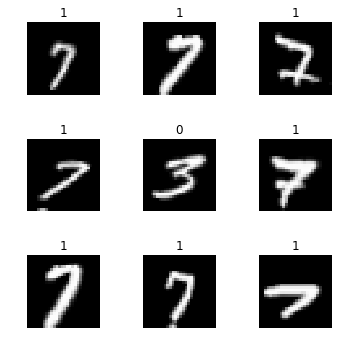

In [68]:
data.show_batch(rows=3, figsize=(5, 5));
data.classes

In [69]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.219656,0.151811,0.943867,00:12
1,0.130440,0.111275,0.958766,00:12


In [70]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=28)
data.classes

[0, 1]

In [71]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [73]:
pat = r'/(\d)/\d+\.png$'
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [77]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
                                     label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [79]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [80]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']